# 1. Exploratory data analysis

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#Importing all of the necessary python libraries

In [2]:
train_data = pd.read_csv("train.tsv", sep='\t', header=None, names=['Review', 'Sentiment']) #Loading the training set into a data frame
dev_data = pd.read_csv("dev.tsv", sep='\t', header=None, names=['Review', 'Sentiment']) #Loading the dev set into a data frame
print("Train Data:")
print(train_data.head(7))
print("\nDev Data:")
print(dev_data.head(7))
#Creating data frames from the given train and dev data in SST-2 and then displaying the first 7 lines of the data frame

Train Data:
                                              Review Sentiment
0                                           sentence     label
1       hide new secretions from the parental units          0
2               contains no wit , only labored gags          0
3  that loves its characters and communicates som...         1
4  remains utterly satisfied to remain the same t...         0
5  on the worst revenge-of-the-nerds clichés the ...         0
6  that 's far too tragic to merit such superfici...         0

Dev Data:
                                              Review Sentiment
0                                           sentence     label
1    it 's a charming and often affecting journey .          1
2                 unflinchingly bleak and desperate          0
3  allows us to hope that nolan is poised to emba...         1
4  the acting , costumes , music , cinematography...         1
5                  it 's slow -- very , very slow .          0
6  although laced with humor and

In [3]:
train_distribution = train_data['Sentiment'].value_counts()
dev_distribution = dev_data['Sentiment'].value_counts()
#Calculate distribution on the basis of training and dev data.

([<matplotlib.axis.XTick at 0x1922fe1f750>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

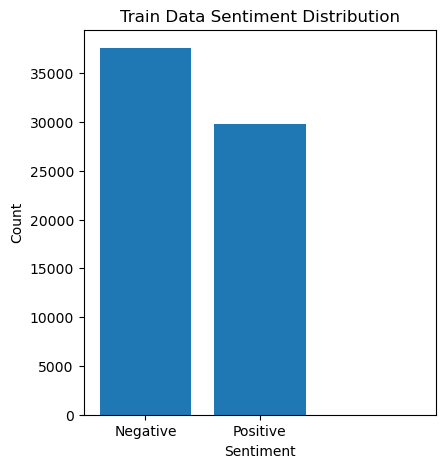

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(train_distribution.index, train_distribution.values)
plt.title('Train Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
#Plotting a bar graph to show the difference in negative nd positive reviews for training data

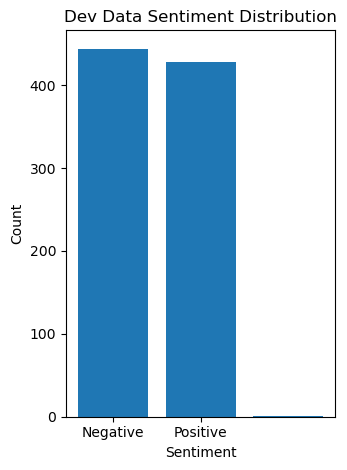

In [5]:
plt.subplot(1, 2, 2)
plt.bar(dev_distribution.index, dev_distribution.values)
plt.title('Dev Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.tight_layout()
plt.show()
#Plotting a bar graph to show the difference in negative and positive reviews for dev data

In [6]:
if train_distribution[0] != train_distribution[1] or dev_distribution[0] != dev_distribution[1]:
    print("There is a data imbalance between positive and negative reviews.")
else:
    print("The dataset is balanced.")
#Checking for imbalance in the reviews which is obvious also from the bar graphs but we can clearly see through this if-else condition

There is a data imbalance between positive and negative reviews.


In [7]:
total_train_reviews = len(train_data)
total_dev_reviews = len(dev_data)
#Calculating the total training and dev reviews

In [8]:
print(f"Total train reviews: {total_train_reviews}")
print(f"Total dev reviews: {total_dev_reviews}")
#Printing the total number of training and dev reviews

Total train reviews: 67350
Total dev reviews: 873


When there's a data imbalance between positive and negative reviews in the training dataset, it can lead to several potential implications for model training and evaluation:

Biased Predictions: The model might become biased towards the majority class (either positive or negative sentiment) due to the imbalance in the data. As a result, it may have a tendency to predict the majority class more frequently, leading to inaccurate predictions for the minority class. Biases in training data can cause intelligent systems to offer assistance that is unintentionally biased.(Arnold, K., Chauncey, K. and Gajos, K. (n.d.). 

Decreased Performance on Minority Class: Models trained on imbalanced datasets often perform poorly on the minority class. Since there are fewer samples available for the minority class, the model may not learn enough about its characteristics, resulting in lower accuracy, precision, recall, and F1-score for that class. 

Model Evaluation: Traditional evaluation metrics like accuracy may not provide an accurate representation of the model's performance, especially in the presence of data imbalance. A model with high accuracy may still perform poorly on the minority class. Therefore, it's essential to consider metrics like precision, recall, and F1-score, which take into account the class imbalance.

Overfitting to Majority Class: In extreme cases of data imbalance, the model may overfit to the majority class, completely ignoring the minority class. This can lead to poor generalization and a lack of robustness when exposed to real-world data with balanced class distributions. You only get accurate predictions if the machine learning model generalizes to all types of data within its domain. Overfitting occurs when the model cannot generalize and fits too closely to the training dataset instead. AWS (n.d.). What is Overfitting?

Handling Imbalance: Addressing data imbalance is crucial for model performance. Techniques such as resampling (e.g., oversampling, undersampling), using class weights, or incorporating cost-sensitive learning approaches can help mitigate the imbalance and improve the model's performance on both classes.  Many tasks involve continuous targets and even infinite values (regression), where hard boundaries between classes do not exist (i.e. age prediction, depth estimation, and so on). Canuma, P. (2022).

##### Overall, understanding the implications of data imbalance on model training and evaluation is essential for developing effective machine learning models for sentiment analysis. By addressing the imbalance and choosing appropriate evaluation metrics, you can build models that perform well across both positive and negative sentiment classes.

# 2. Text vectorisation

## Bag of Words Vectorization

In [9]:
bow_vectorizer = CountVectorizer() #Initializing a CountVectorizer object, which will convert text data into bag-of-words (BoW) vectors
train_bow = bow_vectorizer.fit_transform(train_data['Review']) #Fitting the CountVectorizer on the training data and transform it into BoW vectors
dev_bow = bow_vectorizer.transform(dev_data['Review']) #Transforming the dev data into BoW vectors using the same CountVectorizer fitted on the training data
print("Shape of BoW vectors for training data:", train_bow.shape) #Printing the shapes of the BoW vectors for both training and dev data respectively
print("Shape of BoW vectors for dev data:", dev_bow.shape)

Shape of BoW vectors for training data: (67350, 13774)
Shape of BoW vectors for dev data: (873, 13774)


## TF-IDF

In [10]:
tfidf_vectorizer = TfidfVectorizer() #Initializing a TfidfVectorizer object, which will convert text data into TF-IDF vectors
train_tfidf = tfidf_vectorizer.fit_transform(train_data['Review']) #Fitting the TfidfVectorizer on the training data and transform it into TF-IDF vectors
dev_tfidf = tfidf_vectorizer.transform(dev_data['Review']) #Transforming the dev data into TF-IDF vectors using the same TfidfVectorizer fitted on the training data
print("Shape of TF-IDF vectors for training data:", train_tfidf.shape) #Printing the shapes of the TF-IDF vectors for both training and dev data respectively
print("Shape of TF-IDF vectors for dev data:", dev_tfidf.shape)

Shape of TF-IDF vectors for training data: (67350, 13774)
Shape of TF-IDF vectors for dev data: (873, 13774)


Both Bag-of-Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF) are widely used techniques for text vectorization in natural language processing tasks. BoW represents text documents as vectors by counting the occurrences of each word in the document, while TF-IDF additionally considers the importance of each word in the context of the entire corpus.

BoW is effective in capturing the presence of words in documents and is relatively simple to implement. It works well for tasks where the frequency of words is indicative of their importance, such as spam detection or sentiment analysis. However, BoW does not consider the semantic meaning of words and treats each word independently, which can lead to a loss of contextual information.

On the other hand, TF-IDF takes into account the importance of words by considering both their frequency within a document and their rarity across the entire corpus. This method addresses the limitations of BoW by assigning higher weights to words that are frequent in a document but rare in the corpus, thus capturing their discriminative power. TF-IDF is particularly useful in tasks where the significance of words varies across documents, such as information retrieval or document classification.

Despite their effectiveness, both methods have their strengths and weaknesses. BoW is computationally efficient and easy to interpret but lacks semantic understanding. TF-IDF, while addressing some of these shortcomings, may struggle with very large or noisy corpora and can be sensitive to outliers. Additionally, both techniques rely heavily on the quality of preprocessing steps such as tokenization, stop-word removal, and stemming or lemmatization.

##### In conclusion, the choice between BoW and TF-IDF depends on the specific task requirements and the nature of the text data. While BoW is a good starting point for many applications, TF-IDF offers a more nuanced representation that considers the importance of words in context.


# 3. Machine learning models

In [11]:
train_features = train_data['Review']
train_labels = train_data['Sentiment']
dev_features = dev_data['Review']
dev_labels = dev_data['Sentiment']
#Loading training data and dev data into features and labels respectively to train machine learning models

## Logistic regression 

In [12]:
bow_vectorizer = CountVectorizer()
logistic_regression = LogisticRegression() #Initialising a logistical regression model for classification
bow_pipeline = make_pipeline(bow_vectorizer, logistic_regression) #Creating a pipeline to streamline the text vectorization and model training process
bow_pipeline.fit(train_data['Review'], train_data['Sentiment']) #Fitting the pipeline on the training data to learn the vocabulary and train the model
dev_predictions_bow = bow_pipeline.predict(dev_data['Review']) #Making predictions based on the fitted dev data
accuracy_bow = accuracy_score(dev_data['Sentiment'], dev_predictions_bow) #Counting accuracy score for dev data
report_bow = classification_report(dev_data['Sentiment'], dev_predictions_bow) #Generates a classification report to evaluate the performance of the model
print("Logistic Regression Results with BoW:")
print(f"Accuracy: {accuracy_bow}")
print("Classification Report:")
print(report_bow) #Displaying the accuracy of the model along with classification report

Logistic Regression Results with BoW:
Accuracy: 0.8178694158075601
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       428
           1       0.80      0.86      0.83       444
       label       0.00      0.00      0.00         1

    accuracy                           0.82       873
   macro avg       0.55      0.55      0.55       873
weighted avg       0.82      0.82      0.82       873



C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [13]:
tfidf_vectorizer = TfidfVectorizer() 
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Review']) #Transforming the training data using TF-IDF vectorization
X_dev_tfidf = tfidf_vectorizer.transform(dev_data['Review']) #Transforming the dev data using the same TF-IDF vectorizer
logistic_regression_tfidf = LogisticRegression() #Initialising a logistical regression model for classification
tfidf_pipeline = make_pipeline(tfidf_vectorizer, logistic_regression_tfidf) #Creating a pipeline to streamline the text vectorization and model training process
tfidf_pipeline.fit(train_data['Review'], train_data['Sentiment']) #Fitting the pipeline on the training data to learn the vocabulary and train the model
dev_predictions_tfidf = tfidf_pipeline.predict(dev_data['Review']) #Making predictions based on the fitted dev data
accuracy_tfidf = accuracy_score(dev_data['Sentiment'], dev_predictions_tfidf) #Counting accuracy score for dev data
report_tfidf = classification_report(dev_data['Sentiment'], dev_predictions_tfidf) #Generates a classification report to evaluate the performance of the model
print("Logistic Regression Results with TF-IDF:")
print(f"Accuracy: {accuracy_tfidf}")
print("Classification Report:")
print(report_tfidf) #Displaying the accuracy of the model along with classification report

Logistic Regression Results with TF-IDF:
Accuracy: 0.8190148911798396
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       428
           1       0.80      0.87      0.83       444
       label       0.00      0.00      0.00         1

    accuracy                           0.82       873
   macro avg       0.55      0.55      0.55       873
weighted avg       0.82      0.82      0.82       873



C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

## Multinomial Naive Bayes

In [14]:
bow_vectorizer = CountVectorizer()
train_features_bow = bow_vectorizer.fit_transform(train_data['Review'])
dev_features_bow = bow_vectorizer.transform(dev_data['Review'])
naive_bayes_classifier = MultinomialNB() # Initializing a Multinomial Naive Bayes classifier
naive_bayes_classifier.fit(train_features_bow, train_data['Sentiment']) #Training the Multinomial Naive Bayes classifier using the BoW training features and corresponding labels
dev_predictions_nb = naive_bayes_classifier.predict(dev_features_bow) #Predicting the sentiment labels for the development data using the trained classifier and BoW features
accuracy_nb = accuracy_score(dev_data['Sentiment'], dev_predictions_nb) #Calculating the accuracy of the Multinomial Naive Bayes classifier on the development data
report_nb = classification_report(dev_data['Sentiment'], dev_predictions_nb) #Generating a classification report for the Multinomial Naive Bayes classifier on the development data
print("Multinomial Naive Bayes (MNB) Results with BoW:") #Printing the results of the Multinomial Naive Bayes classifier with BoW
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:")

Multinomial Naive Bayes (MNB) Results with BoW:
Accuracy: 0.8052691867124857
Classification Report:


C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
tfidf_vectorizer = TfidfVectorizer()
train_features_tfidf = tfidf_vectorizer.fit_transform(train_data['Review'])
dev_features_tfidf = tfidf_vectorizer.transform(dev_data['Review'])
naive_bayes_classifier_tfidf = MultinomialNB() #Initializing a Multinomial Naive Bayes classifier
naive_bayes_classifier_tfidf.fit(train_features_tfidf, train_data['Sentiment']) #Training the Multinomial Naive Bayes classifier using the TF-IDF training features and corresponding labels
dev_predictions_nb_tfidf = naive_bayes_classifier_tfidf.predict(dev_features_tfidf) #Calculating the accuracy of the Multinomial Naive Bayes classifier on the development data
accuracy_nb_tfidf = accuracy_score(dev_data['Sentiment'], dev_predictions_nb_tfidf) #Generating a classification report for the Multinomial Naive Bayes classifier on the development data
report_nb_tfidf = classification_report(dev_data['Sentiment'], dev_predictions_nb_tfidf)
print("Multinomial Naive Bayes (MNB) Results with TF-IDF:") #Printing the results of the Multinomial Naive Bayes classifier with TF-IDF
print(f"Accuracy: {accuracy_nb_tfidf}")
print("Classification Report:")
print(report_nb_tfidf)

Multinomial Naive Bayes (MNB) Results with TF-IDF:
Accuracy: 0.7995418098510882
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       428
           1       0.77      0.87      0.82       444
       label       0.00      0.00      0.00         1

    accuracy                           0.80       873
   macro avg       0.54      0.53      0.53       873
weighted avg       0.80      0.80      0.80       873



C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest 

In [16]:
bow_vectorizer = CountVectorizer()
train_features_bow = bow_vectorizer.fit_transform(train_data['Review']) 
dev_features_bow = bow_vectorizer.transform(dev_data['Review'])
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #Initializing a Random Forest classifier
random_forest_classifier.fit(train_features_bow, train_data['Sentiment']) #Training the Random Forest classifier using the BoW training features and corresponding labels
dev_predictions_rf = random_forest_classifier.predict(dev_features_bow) #Calculating the accuracy of the Random Forest classifier on the development data
accuracy_rf = accuracy_score(dev_data['Sentiment'], dev_predictions_rf) #Generating a classification report for the Random Forest classifier on the development data
report_rf = classification_report(dev_data['Sentiment'], dev_predictions_rf)
print("Random Forest Results with BoW:") #Printing the results of the Random Forest classifier with Bow
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(report_rf)

Random Forest Results with BoW:
Accuracy: 0.7697594501718213
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       428
           1       0.75      0.82      0.78       444
       label       1.00      1.00      1.00         1

    accuracy                           0.77       873
   macro avg       0.85      0.85      0.85       873
weighted avg       0.77      0.77      0.77       873



In [17]:
tfidf_vectorizer = TfidfVectorizer()
train_features_tfidf = tfidf_vectorizer.fit_transform(train_data['Review'])
dev_features_tfidf = tfidf_vectorizer.transform(dev_data['Review'])
random_forest_classifier_tfidf = RandomForestClassifier(n_estimators=100, random_state=42) #Initializing a Random Forest classifier
random_forest_classifier_tfidf.fit(train_features_tfidf, train_data['Sentiment']) #Training the Random Forest classifier using the TF-IDF training features and corresponding labels
dev_predictions_rf_tfidf = random_forest_classifier_tfidf.predict(dev_features_tfidf) #Calculating the accuracy of the Random Forest classifier on the development data
accuracy_rf_tfidf = accuracy_score(dev_data['Sentiment'], dev_predictions_rf_tfidf) #Generating a classification report for the Random Forest classifier on the development data
report_rf_tfidf = classification_report(dev_data['Sentiment'], dev_predictions_rf_tfidf)
print("Random Forest Results with TF-IDF:") #Printing the results of the Random Forest classifier with Bow
print(f"Accuracy: {accuracy_rf_tfidf}")
print("Classification Report:")
print(report_rf_tfidf)

Random Forest Results with TF-IDF:
Accuracy: 0.7731958762886598
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       428
           1       0.77      0.80      0.78       444
       label       1.00      1.00      1.00         1

    accuracy                           0.77       873
   macro avg       0.85      0.85      0.85       873
weighted avg       0.77      0.77      0.77       873



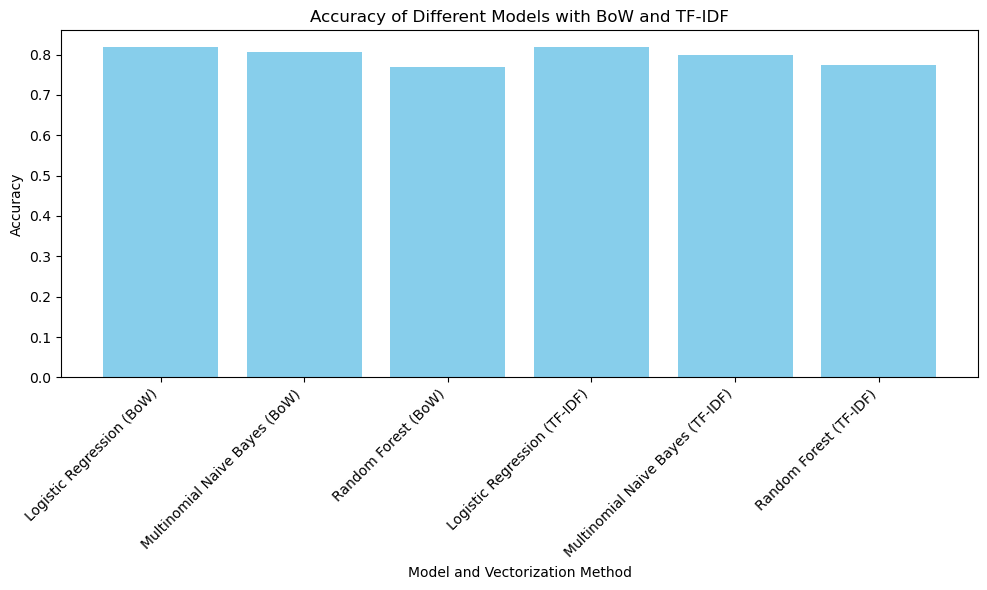

In [18]:
accuracy_values = {
    'Logistic Regression (BoW)': accuracy_bow,
    'Multinomial Naive Bayes (BoW)': accuracy_nb,
    'Random Forest (BoW)': accuracy_rf,
    'Logistic Regression (TF-IDF)': accuracy_tfidf,
    'Multinomial Naive Bayes (TF-IDF)': accuracy_nb_tfidf,
    'Random Forest (TF-IDF)': accuracy_rf_tfidf
}
plt.figure(figsize=(10, 6))
plt.bar(accuracy_values.keys(), accuracy_values.values(), color='skyblue')
plt.xlabel('Model and Vectorization Method')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models with BoW and TF-IDF')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#Comparing the accuracies of all of the Machine learning models that have been deployed on both vectorisation methods

Logistic Regression with Bag-of-Words (BoW):

Accuracy: 81.79%
Strengths:
Logistic regression is simple and interpretable.
BoW representation captures the frequency of words, which can be effective for sentiment analysis.
Weaknesses:
Assumes linear relationship between features and target, which may not always hold true.
BoW representation doesn't consider the semantic meaning of words.
Achieves a reasonable accuracy but may not capture nuanced sentiment due to its simplistic approach.


Logistic Regression with TF-IDF:

Accuracy: 81.90%
Strengths:
TF-IDF representation assigns weights to words based on their importance in the corpus, capturing more nuanced information.
Logistic regression is still interpretable and can handle large feature spaces.
Weaknesses:
Similar to BoW logistic regression, it assumes linear relationships between features and target.
Similar performance to BoW logistic regression, but TF-IDF may capture more nuanced information due to its weighting scheme.


Multinomial Naive Bayes (MNB) with BoW:

Accuracy: 80.53%
Strengths:
Naive Bayes is computationally efficient and performs well in high-dimensional spaces.
BoW representation aligns well with the assumption of independence between features.
Weaknesses:
Naive Bayes assumes feature independence, which may not hold true in practice.
BoW representation may lose semantic meaning.
Achieves a slightly lower accuracy compared to logistic regression, but still performs reasonably well.


Multinomial Naive Bayes (MNB) with TF-IDF:

Accuracy: 79.95%
Strengths:
TF-IDF representation captures the importance of words in the corpus.
MNB is robust and performs well with sparse data.
Weaknesses:
Similar to BoW MNB, it assumes feature independence and may lose semantic meaning.
Slightly lower accuracy compared to BoW MNB, but TF-IDF may capture more nuanced information.


Random Forest with BoW:

Accuracy: 76.98%
Strengths:
Random Forest can capture complex nonlinear relationships between features and target.
BoW representation captures word frequency, which can be useful.
Weaknesses:
Random Forest can be prone to overfitting, especially with high-dimensional data.
Achieves lower accuracy compared to logistic regression and MNB, indicating potential overfitting or inability to capture sentiment nuances.


Random Forest with TF-IDF:

Accuracy: 77.32%
Strengths:
Similar to BoW Random Forest, it can capture complex relationships and may benefit from TF-IDF's weighted representation.
Weaknesses:
Similar to BoW Random Forest, it may suffer from overfitting.
Similar performance to BoW Random Forest, indicating that TF-IDF may not significantly improve performance in this case.

##### Overall, logistic regression with TF-IDF achieves the highest accuracy (81.90%) and balances simplicity, interpretability, and performance.Therefore, logistic regression with TF-IDF is selected as the most suitable model for sentiment analysis in this scenario.

# 4. The hyper-parameter values

In [19]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Defining a dictionary specifying the hyperparameter grid for logistic regression
    'penalty': ['l1', 'l2']
}
logistic_classifier = LogisticRegression(max_iter=1000) # Initializing a logistic regression classifier with a maximum number of iterations set to 1000
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5) # Initializing a grid search cross-validation object with logistic regression classifier and hyperparameter grid
grid_search.fit(train_tfidf, train_data['Sentiment']) # Performing grid search to find the best hyperparameters using the TF-IDF features of the training data
best_params = grid_search.best_params_ #Retrieving the best hyperparameters and the corresponding best accuracy from the grid search
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:", best_params) #Printing the best hyperparameters
print("Best Accuracy:", best_accuracy)

C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(est

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Accuracy: 0.9061766889383815


In [20]:
best_logistic_classifier = LogisticRegression(C=1, penalty='l2', max_iter=1000) #Initialising the a logistic regression classifier with the best hyperparameters manually
best_logistic_classifier.fit(train_tfidf, train_data['Sentiment']) #Fitting the logistic regression model on the training set
dev_predictions = best_logistic_classifier.predict(dev_tfidf) #Predicting the accuracy of the model on the dev data set
accuracy = accuracy_score(dev_data['Sentiment'], dev_predictions) #Saving the accuracy to a variable
print("Accuracy:", accuracy) #Printing the accuracy after changing the hyperparameter values manually
joblib.dump(best_logistic_classifier, 'best_logistic_model.pkl') #Storing the machine learning model in a variable to deploy on the test.tsv file

Accuracy: 0.8190148911798396


['best_logistic_model.pkl']

The rationale behind the selection of the explored hyperparameters (C and Penalty):

Regularization Strength (C): The C hyperparameter controls the regularization strength in logistic regression models. It represents the inverse of regularization strength, where smaller values of C specify stronger regularization.

In logistic regression, regularization helps prevent overfitting by penalizing large coefficient values. A smaller C value increases the regularization strength, leading to simpler models with coefficients closer to zero. This can help mitigate the risk of overfitting, especially in scenarios where the feature space is large or when the training data is limited.

Penalty (l1 or l2): The penalty hyperparameter determines the type of regularization applied in logistic regression models. It can take two values: l1 for L1 regularization (Lasso) and l2 for L2 regularization (Ridge).

L1 regularization encourages sparsity in the coefficient matrix by driving some coefficients to exactly zero. On the other hand, L2 regularization penalizes the squared magnitude of coefficients, leading to smaller but non-zero coefficients. The choice between l1 and l2 penalties depends on the sparsity requirement and the presence of correlated features in the dataset. If feature selection or sparsity is desired, l1 regularization may be preferred. Otherwise, l2 regularization is a more common choice.

##### After performing various checks across 'C' values and penalty. The highest accuracy is observed when the hyper paramter values are C=1 and penalty=l2. Instead of C=10, which only gives an accuracy of 80% whereas C being set to 1 gives an accuracy of approximately 82%. Due to this difference, I have decided to optimise C to 1 and penalty to l2. This should give the best and most optimised model to deploy on the test set.

# 5. Model deployment.

In [21]:
best_logistic_model = joblib.load('best_logistic_model.pkl') #Initialising the best machine learning model for deployment
test_data = pd.read_csv('test.tsv', sep='\t') #Loading the test.tsv data set
test_sentences = test_data['sentence']
test_features = tfidf_vectorizer.transform(test_sentences) #Transforming the test sentences into TF-IDF features using the TF-IDF vectorizer
test_predictions = best_logistic_model.predict(test_features) #Predicting test sentences on the basis of the machine learning model deployed

In [22]:
for sentence, prediction in zip(test_sentences, test_predictions): #Printing the predictions made by the machine learning model on the test.tsv file
    print("Sentence:", sentence)
    print("Prediction:", prediction)
    print("-" * 100)

Sentence: uneasy mishmash of styles and genres .
Prediction: 0
----------------------------------------------------------------------------------------------------
Sentence: this film 's relationship to actual tension is the same as what christmas-tree flocking in a spray can is to actual snow : a poor -- if durable -- imitation .
Prediction: 0
----------------------------------------------------------------------------------------------------
Sentence: by the end of no such thing the audience , like beatrice , has a watchful affection for the monster .
Prediction: 0
----------------------------------------------------------------------------------------------------
Sentence: director rob marshall went out gunning to make a great one .
Prediction: 1
----------------------------------------------------------------------------------------------------
Sentence: lathan and diggs have considerable personal charm , and their screen rapport makes the old story seem new .
Prediction: 1
-------

### Ethical Implications:

##### Privacy: When dealing with sentiment analysis of reviews, it's crucial to respect the privacy of individuals who wrote those reviews. Ensuring that no personally identifiable information is exposed or misused is essential. Preserving the privacy of text data is a tough challenge due to the hardness of identifying sensitive attributes in text alongside the computational costs. Sousa, S. and Kern, R. (2022). 

##### Bias and Fairness: Sentiment analysis models can inherit biases present in the training data, leading to unfair treatment of certain groups. It's crucial to continuously monitor and mitigate bias to ensure fair and unbiased predictions.

##### Transparency: Providing transparency about how sentiment analysis models work, including their limitations and potential biases, is important for building trust with users and stakeholders.

### Scientific Integrity:

##### Data Quality: Ensuring the quality and integrity of the data used for training and evaluation is paramount. This includes addressing issues such as data imbalance, noise, and mislabeled data to ensure robust and reliable results.

##### Methodology: Using rigorous methodologies, such as cross-validation and hyperparameter tuning, helps ensure the validity and reproducibility of the results. Documenting the entire process, including data preprocessing, model selection, and evaluation metrics, enhances the scientific integrity of the design.

##### Peer Review: Subjecting the research and analysis to peer review by experts in the field can help identify potential flaws, improve the methodology, and validate the findings.

### Unintended Consequences:

##### Feedback Loop: Sentiment analysis models deployed in real-world applications can influence user behavior and opinions. If users are aware of the sentiment analysis process, they might modify their behavior to manipulate the system, leading to unintended consequences.

##### Misinterpretation: Misinterpretation of sentiment analysis results, especially in sensitive contexts, can lead to misunderstandings or misjudgments. It's essential to communicate the limitations of sentiment analysis and avoid overreliance on automated predictions.

##### Social Impact: Sentiment analysis can have broader societal implications, especially when applied to large-scale data analysis. It's crucial to consider the potential impact on public opinion, market dynamics, and social discourse, ensuring responsible and ethical use of sentiment analysis technology.

#### By addressing these ethical considerations, maintaining scientific integrity, and being mindful of potential unintended consequences, we strive to develop and deploy sentiment analysis solutions that are both effective and responsible.

References : 

(Arnold, K., Chauncey, K. and Gajos, K. (n.d.). 
Sentiment Bias in Predictive Text Recommendations Results in Biased Writing. [online] Available at: https://www.eecs.harvard.edu/~kgajos/papers/2018/arnold18sentiment.pdf [Accessed 11 Apr. 2024].)

AWS (n.d.). What is Overfitting?- Overfitting - 
AWS. [online] Amazon Web Services, Inc. Available at: https://aws.amazon.com/what-is/overfitting/.
 
 
Canuma, P. (2022). 
How to Deal With Imbalanced Classification and Regression Data. [online] neptune.ai. Available at: https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data.

Sousa, S. and Kern, R. (2022). 
How to keep text private? A systematic review of deep learning methods for privacy-preserving natural language processing. Artificial Intelligence Review. doi:https://doi.org/10.1007/s10462-022-10204-6.